## Exercise 1
Variance is the same for all classes - thus variances cancel each other out when finding decision boundaries - i.e. they become linear

## Exercise 2
### a) sketching figure 1

In [48]:
import numpy as np

from scipy.stats import norm
from scipy.optimize import fsolve

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix

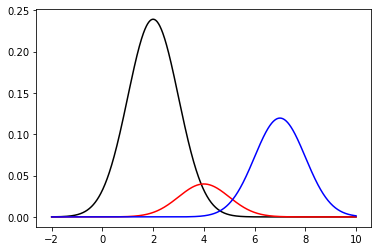

In [4]:
# Classes
classes = ['Black','Red','Blue']
mus = [2,4,7]
sigma = [1,1,1]

# Class conditionals
cc0 = lambda x: norm.pdf(x,mus[0],sigma[0])
cc1 = lambda x: norm.pdf(x,mus[1],sigma[1])
cc2 = lambda x: norm.pdf(x,mus[2],sigma[2])

# Class priors
priors = [.6,.1,.3]
p0, p1, p2 = priors

# Joint distribution
j0 = lambda x: cc0(x) * p0
j1 = lambda x: cc1(x) * p1
j2 = lambda x: cc2(x) * p2

# plot
xs = np.linspace(-2,10,1000)
fig, ax = plt.subplots()
ax.plot(xs, j0(xs), c=classes[0], label=f'P(X,Y={classes[0]})')
ax.plot(xs, j1(xs), c=classes[1], label=f'P(X,Y={classes[1]})')
ax.plot(xs, j2(xs), c=classes[2], label=f'P(X,Y={classes[2]})');

Decision Regions are the intervals where a class has the highest probability. 

Highest y-value (joint distribution) in a point $x_i$ gives the class

In [ ]:
# Approximate decision regions;
# ]-infty : 4] -> Black
# ]4 : 5] -> Red
# ]5 : \infty[ -> Blue

### b) misclassification errors
1. Classify to black when it is red
2. Classify to blue when it is red
3. Classify to red when it is black
4. Classify to red when it is blue
5. Classify to black when it is blue
6. Classify to blue when it is black

### c) probs of errors
For each decision region, we integrate the probabilities of classes that are NOT chosen within the decision region boundaries. This gives us an error for a specific misclassification error. I.e. point 1 from b would be integral of read curve with boundaries ]-$\infty$ : 4]

### d) Decision boundaries

In [10]:
# For two functions f and g, return x where f(x)=g(x)
intersection = lambda f, g: fsolve(lambda x: f(x)-g(x), 0.0)
discriminant = lambda mu_k, pi_k, sigma: lambda x: (mu_k * x / (sigma ** 2)) - (mu_k**2 / (2*(sigma**2))) + np.log(pi_k)

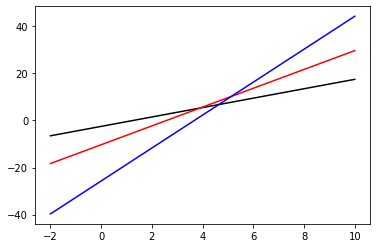

In [13]:
# discriminants
d0 = discriminant(mus[0],priors[0],sigma[0])
d1 = discriminant(mus[1],priors[1],sigma[1])
d2 = discriminant(mus[2],priors[2],sigma[2])

# plot
xs = np.linspace(-2,10,1000)
fig, ax = plt.subplots()
ax.plot(xs, d0(xs), c=classes[0], label=f'P(X,Y={classes[0]})')
ax.plot(xs, d1(xs), c=classes[1], label=f'P(X,Y={classes[1]})')
ax.plot(xs, d2(xs), c=classes[2], label=f'P(X,Y={classes[2]})');

In [15]:
# compute decision boundaries
b0 = intersection(d0,d1)[0]
b1 = intersection(d1,d2)[0]
print(b0,b1)

3.8958797346140273 5.1337959037772976


### e) Probabilities of misclassification errors

In [24]:
# Compute Predicted Misclassification Errors
# PRED BLACK TRUE RED
e1 = norm.cdf(b0,loc=mus[1]) * priors[1]
# PRED BLACK TRUE BLUE
e2 = norm.cdf(b0,loc=mus[2]) * priors[2]

# PRED RED TRUE BLACK
e3 = (norm.cdf(b1,loc=mus[0])-norm.cdf(b0,loc=mus[0])) * priors[0]
# PRED RED TRUE BLUE
e4 = (norm.cdf(b1,loc=mus[2])-norm.cdf(b0,loc=mus[2])) * priors[2]

# PRED BLUE TRUE BLACK
e5 = (1-norm.cdf(b1,loc=mus[0])) * priors[0]
# PRED BLUE TRUE RED
e6 = (1-norm.cdf(b1,loc=mus[1])) * priors[1]

print('Predict Black:\nTrue is Red: ',e1,'\nTrue is Blue: ',e2)
print('\nPredict Red:\nTrue is Black: ',e3,'\nTrue is Blue: ',e4)
print('\nPredict Blue:\nTrue is Black: ',e5,'\nTrue is Red: ',e6)

Predict Black:
True is Red:  0.045853695440665976 
True is Blue:  0.0002862686060283338

Predict Red:
True is Black:  0.01687510226850677 
True is Blue:  0.009015653826047893

Predict Blue:
True is Black:  0.0005176825033539556 
True is Red:  0.012844008481836556


### f) Expected error rate

In [25]:
print('\nTotal Expected error / Bayes Error Rate / Probability of making a mistake:',e1+e2+e3+e4+e5+e6)


Total Expected error / Bayes Error Rate / Probability of making a mistake: 0.08539241112643949


### g) Simulate 1000 observations from model

In [30]:
def simulate(class_means, class_priors, n=1000):
    # get y by sampling from class prior
    y = np.random.choice([0,1,2], n, p=class_priors)
    # use y to sample x from class conditional
    x = []
    for k in y:
        xval = norm.rvs(loc=class_means[k], size=1)[0] # Sampling from a normal Distribution
        x.append(xval)
    # Return x, y [x=(1000,), y=(1000,)]
    return[x,y]

In [38]:
x,y = simulate(mus, priors)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.4)

#reshape to fit sklearn
x_train = np.asarray(x_train).reshape(-1,1)
x_test = np.asarray(x_test).reshape(-1,1)

### h-i) Train model and predict - confusion matrix & errors

In [39]:
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

In [49]:
print('Linear Discriminant Analysis (LDA)')
lda.fit(x_train,y_train)
lda_preds = lda.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,lda_preds))
print(confusion_matrix(y_test, lda_preds))

Linear Discriminant Analysis (LDA)
Accuracy Score:  0.91
[[229   5   0]
 [ 24  21   4]
 [  0   3 114]]


In [50]:
print('Quadratic Discriminant Analysis (QDA)')
qda.fit(x_train,y_train)
qda_preds = qda.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,qda_preds))
print(confusion_matrix(y_test, qda_preds))

Quadratic Discriminant Analysis (QDA)
Accuracy Score:  0.9125
[[229   5   0]
 [ 23  22   4]
 [  0   3 114]]
